In [1]:
#Zachary Bédard 261113611

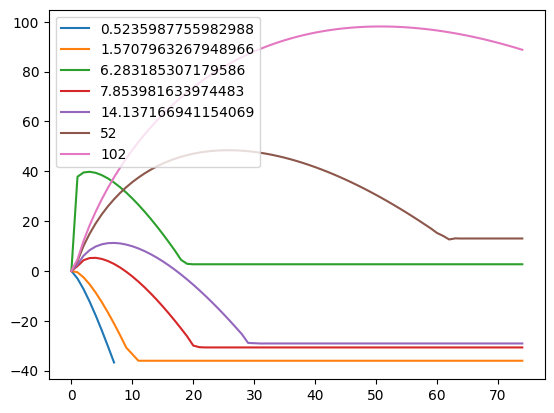

The slope of a curve, on this graph, represent the evolution of the logarithm of the error as we add terms in the series.
We want to get in the situation where the curve stabilise at a very small value.
as we see on the graph, sin(x) converges very rapidly for small values of x.
however, as the argument becomes bigger (bigger than 2pi), the curve increase a lot in the beginning, and stabilise at higher and 
higher values, wich means that not only does it takes more terms to get to an answer, but also that the relative error becomes bigger.
We need to implement some argument reduction such that sin(x) converges no matter the argument !


In [102]:
#QUESTION 1 :
"""
Implement a function that computes sin x via the plain power series, that is, without
any argument reduction. Study its convergence for different (large and small) values of
x, by plotting a graph with n on the horizontal axis and the logarithm of the error on
the vertical axis. What does the (average) slope of this graph signify?
"""
import math

import matplotlib.pyplot as plt


def factorial(x): #helper function to compute x!

    if x == 0 :
        return 1
    return x * factorial(x-1)

def sin(x, n): # n is the number of iterations

    result = 0


    for n in range(n):

        result+= (x ** (2*n + 1)) * ((-1) ** n ) / (factorial(2*n + 1)) #at each iteration, we add the next term of the serie.

    return result

#print("x                        myValue                  realValue                absoluteError            relativeError")

for x in [math.pi/6, math.pi/2, 2 * math.pi, (5/2) * math.pi, (9/2) * math.pi,52 ,  102] :
    
    horizontal = []
    vertical = []
    
    for n in range(75) :
    
        
        
        myValue = sin(x, n)
        realValue = math.sin(x)
    
        absoluteError = abs(realValue - myValue) 
        relativeError = absoluteError/abs(realValue)

        if abs(relativeError) != 0 : # necessery to prevent log(0) when the error becomes very small and floating point round it down to 0.
            vertical.append(math.log(abs(relativeError)))
            horizontal.append(n)
        
        #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
    plt.plot(horizontal,vertical, label=str(x))






leg = plt.legend(loc='upper left')
plt.show()

# the slope of a curve, on this graph, represent the evolution of the logarithm of the error as we add terms in the series.
# We want to get in the situation where the curve stabilise at a very small value.
# as we see on the graph, sin(x) converges very rapidly for small values of x.
# however, as the argument becomes bigger (bigger than 2pi), the curve increase a lot in the beginning, and stabilise at higher and 
# higher values, wich means that not only does it takes more terms to get to an answer, but also that the relative error becomes bigger.
# We need to implement some argument reduction such that sin(x) converges no matter the argument !

print("The slope of a curve, on this graph, represent the evolution of the logarithm of the error as we add terms in the series.")
print("We want to get in the situation where the curve stabilise at a very small value.")
print("as we see on the graph, sin(x) converges very rapidly for small values of x.")
print("however, as the argument becomes bigger (bigger than 2pi), the curve increase a lot in the beginning, and stabilise at higher and ")
print("higher values, wich means that not only does it takes more terms to get to an answer, but also that the relative error becomes bigger.")
print("We need to implement some argument reduction such that sin(x) converges no matter the argument !")



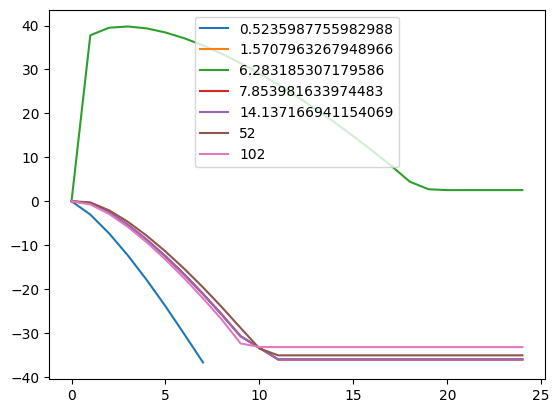

Now, we only use the serie to compute values for x smaller that 2pi in absolute value. (since sin is cyclical, we dont lose any accuracy)
Our function now converges no matter the size of the argument ! And it converges at lot faster than before !
we still struggle when sin(x) ≈ 0 because of cancellation of digit.  


In [104]:
#QUESTION 2 :

"""
Make a version 2.0 of your code for sin x by adding an argument reduction procedure.
You need to make some design decisions on the argument reduction method, on how
much you want to reduce the argument, etc. Consider several options to reduce the
argument, and experimentally compare them with each other, in order to nally pick
the best one. Demonstrate the superiority of version 2.0 as compared to version 1.0 on
not-so-small arguments.
"""

def sin2(x, n) :

    while (x > 2 * math.pi) :
        x = x - 2 * math.pi

    while ( x < - 2 * math.pi) :
        x = x - 2 * math.pi

    if x == 0 : 
        return 0

    #print("fully reduced x is : " + str(x))

    sin_x = sin(x,n)

    if x < 0 and x < - math.pi or x > 0 and x > math.pi : 
        sin_x = - sin_x

    return sin_x

for x in [math.pi/6, math.pi/2, 2 * math.pi, (5/2) * math.pi, (9/2) * math.pi,52 ,  102]  :

    
    horizontal2 = []
    vertical2 = []
    
    for n in range(25) :
    
     
        
        myValue = sin2(x, n)
        realValue = math.sin(x)
    
        absoluteError = abs(realValue - myValue) 
        relativeError = absoluteError/abs(realValue)

        if (abs(relativeError) != 0) :
            vertical2.append(math.log(abs(relativeError)))
            horizontal2.append(n)
        
        #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
    plt.plot(horizontal2,vertical2, label=str(x))





leg = plt.legend(loc='upper center')
plt.show()

#print(math.sin(math.pi/4))
#print(sin2(math.pi/4,5))

# Now, we only use the serie to compute values for x smaller that 2pi in absolute value. (since sin is cyclical, we dont lose any accuracy)
# Our function now converges no matter the size of the argument ! And it converges at lot faster than before !
# we still struggle when sin(x) ≈ 0 because of cancellation of digit.  

print("Now, we only use the serie to compute values for x smaller that 2pi in absolute value. (since sin is cyclical, we dont lose any accuracy)")
print("Our function now converges no matter the size of the argument ! And it converges at lot faster than before !")
print("we still struggle when sin(x) ≈ 0 because of cancellation of digit.  ")


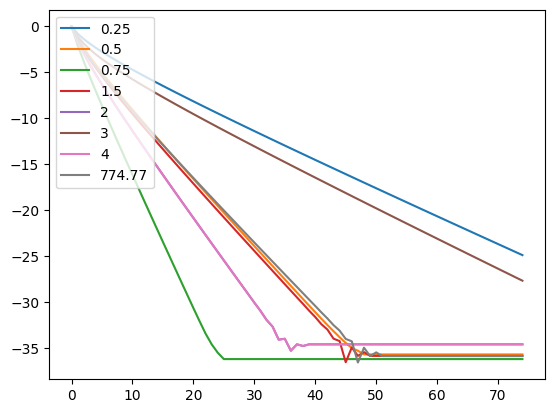

as we wee on the graph, all curves are trending downward ! Our result converges pretty rapidly. Some values are more problematic
than other however, notably 0.25 and 3. 


In [27]:
#QUESTION 3 :

"""
Implement a function that computes ln x for any given positive input. In the same spirit
as the preceding 2 questions, study its convergence behaviour, and various argument
reduction options.
"""

def ln(x,n) : 


    multiplier = 1

    # argument reduction part : using the fact that ln(x^2) = 2ln(x)
    
    while (x >= 2) :

        x = math.sqrt(x)
        multiplier = multiplier * 2
        

    result = 0


    for n in range(n):

        result+= ((-1)**(n)*(x-1)**(n+1))/(n+1)
        
    return result * multiplier

def ln2(x,n) : 

    result = 0

    # argument reduction part : using the fact that ln(ex) = ln(e)+ln(x) = 1 + ln(x)
    
    multiplier = 1
    
    while (x > math.exp(1)) :
        x = x /  math.exp(1)
        result +=1

    for n in range(n):

        result+= ((-1)**(n)*(x-1)**(n+1))/(n+1)
        
    return result * multiplier

for x in [0.25, 0.5, 0.75, 1.5, 2, 3, 4, 774.77] : 

    
    
    horizontal = []
    vertical = []
    
    for n in range(75) :
    
     
        
        myValue = ln(x, n)
        realValue = math.log(x)
    
        absoluteError = abs(realValue - myValue) 
        relativeError = absoluteError/abs(realValue)
    
        if relativeError != 0:
        
            horizontal.append(n)
        
            vertical.append(math.log(abs(relativeError)))
        
        #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
    plt.plot(horizontal,vertical, label=str(x))






leg = plt.legend(loc='upper left')
plt.show()


# as we wee on the graph, all curves are trending downward ! Our result converges pretty rapidly. Some values are more problematic
# than other however, notably 0.25 and 3. 

print("as we wee on the graph, all curves are trending downward ! Our result converges pretty rapidly. Some values are more problematic")
print("than other however, notably 0.25 and 3. ")


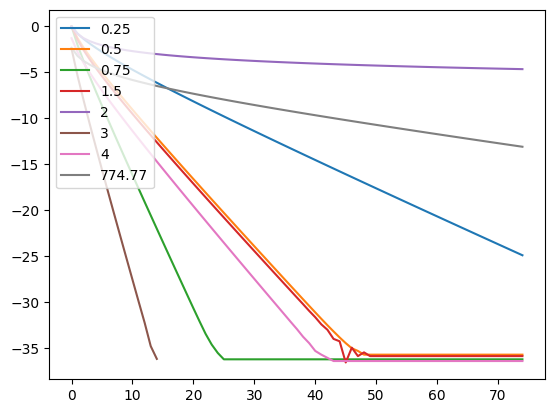

here also, all curves are trending downward ! However, some values ( 2 and 774.77) seems to follow a negative logarithm
path to convergence, and will converges very slowly. This seems overall inferior to our first method.


In [105]:
#QUESTION 3 (continued) :

for x in [0.25, 0.5, 0.75, 1.5, 2, 3, 4, 774.77] : 

    
    
    horizontal = []
    vertical = []
    
    for n in range(75) :
    
        
        
        myValue = ln2(x, n)
        realValue = math.log(x)
    
        absoluteError = abs(realValue - myValue) 
        relativeError = absoluteError/abs(realValue)

        if relativeError != 0:
        
            horizontal.append(n)
        
            vertical.append(math.log(abs(relativeError)))
        
        #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
    plt.plot(horizontal,vertical, label=str(x))





leg = plt.legend(loc='upper left')
plt.show()

# Here also, all curves are trending downward ! However, some values ( 2 and 774.77) seems to follow a negative logarithm
# path to convergence, and will converges very slowly. This seems overall inferior to our first method.
print("here also, all curves are trending downward ! However, some values ( 2 and 774.77) seems to follow a negative logarithm")
print("path to convergence, and will converges very slowly. This seems overall inferior to our first method.")

In [78]:
#QUESTION 4 :

"""
Propose several different fast ways of computing ln 3, and compare their speed.
"""
# we can use both of the method we've designed :
print(ln(3,10)) 

print(ln2(3,10))

# has we have seen before, for x=3, ln2 is faster than ln, because we can reduce the argument more by divising by e
# instead of simply taking the square rooot one time.

'\nPropose several different fast ways of computing ln 3, and compare their speed.\n'

In [ ]:
#PART 2 : Now we will deal with fixed point iterations

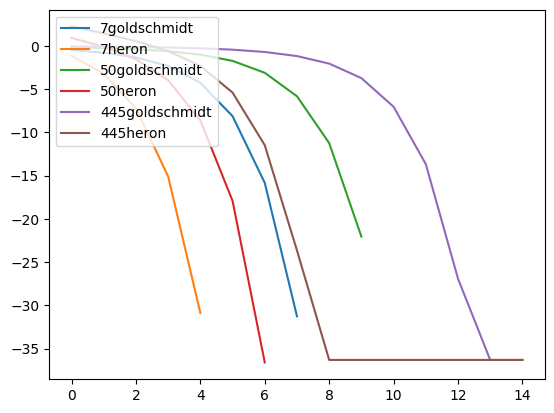

In [109]:
#QUESTION 1 :

"""
Experimentally compare the performance of Goldschmidt's method and Heron's method
for computing square roots. Design an experiment to illustrate the self-correcting be-
haviour of Heron's method, and the opposite behaviour of Goldschmidt's method.
"""
import math

def goldschmidt_sqrt(a, n):

    a_i = a

    Y_i = 1/a

    x_i = a_i * Y_i # current guess for sqrt(a)
    y_i = Y_i # current guess for 1/sqrt(a)
    
    for i in range(n):

        a_i = a_i * (Y_i ** 2)

        Y_i = (3 - a_i)/2

        x_i = x_i * Y_i

        y_i = y_i * Y_i

    return x_i

def heron_sqrt(a, precision):

    x =  a / 2
    
   
    #while ((x - a/x) > precision ) : # <- this would be using a posteriori error estimate to stop the iteration.
                                      # we dont use it here because we want to compare the number of iterations necessary 
                                      # to get to a good result.
    for i in range(n):
    
        x = (x + a/x)/2

    return x
    

for x in [7, 50,  445]: 

    
    
    horizontal = []
    vertical = []
    
    for n in range(15) :
    
        my_goldschmidt_value = goldschmidt_sqrt(x, n)
        realValue = math.sqrt(x)
    
        absoluteError = abs(realValue - my_goldschmidt_value) 
        relativeError = absoluteError/abs(realValue)
    
        if abs(relativeError) != 0 : 
            vertical.append(math.log(abs(relativeError)))
            horizontal.append(n)
    
        
        #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
    plt.plot(horizontal,vertical, label= str(x) + "goldschmidt")

    
    horizontal = []
    vertical = []

    for n in range(15) :
    
    
        
        my_heron_value = heron_sqrt(x, n)
        realValue = math.sqrt(x)
    
        absoluteError = abs(realValue - my_heron_value) 
        relativeError = absoluteError/abs(realValue)


        if abs(relativeError) != 0 : 
            vertical.append(math.log(abs(relativeError)))
            horizontal.append(n)
    
        
        #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
    plt.plot(horizontal,vertical, label=str(x) + "heron")


leg = plt.legend(loc='upper left')
plt.show()


# Heron seems to converge faster for smaller x, while goldshmit is better for bigger x. 
# See next cell for the self correction experiment. Note : when the curves end, it means that the relative error as 
# become so small that it is impossible to compute the logarithm anymore.

# See next cell for self-correction experiment.


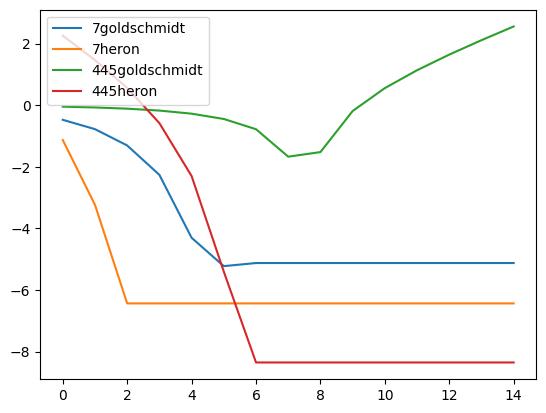

In [110]:
#SELF-Correction experiment
# we round everything to the 2'th decimal place each step

dec_place = 2

def goldschmidt_sqrt(a, n):

    a_i = a

    Y_i = 1/a

    x_i = a_i * Y_i
    y_i = Y_i
    
    for i in range(n):

        a_i = round (a_i * (Y_i ** 2), dec_place)

        Y_i = round((3 - a_i)/2, dec_place)

        x_i = round(x_i * Y_i, dec_place)

        y_i = round(y_i * Y_i, dec_place)

        

    return x_i

def heron_sqrt(a, precision):

    x =  a / 2
    
   
    #while ((x - a/x) > precision ) :
    for i in range(n):
    
        x = round((x + a/x)/2 , dec_place)

    return x



for x in [ 7, 445]: 

    horizontal = []
    vertical = []
    
    for n in range(15) :

        
        my_goldschmidt_value = goldschmidt_sqrt(x, n)
        realValue = math.sqrt(x)
    
        absoluteError = abs(realValue - my_goldschmidt_value) 
        relativeError = absoluteError/abs(realValue)
    
        if abs(relativeError) != 0 : 
            vertical.append(math.log(abs(relativeError)))
            horizontal.append(n)
             
        #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
    plt.plot(horizontal,vertical, label= str(x) + "goldschmidt")

    
    horizontal = []
    vertical = []

    for n in range(15) :

        
        my_heron_value = heron_sqrt(x, n)
        realValue = math.sqrt(x)
    
        absoluteError = abs(realValue - my_heron_value) 
        relativeError = absoluteError/abs(realValue)
    
        if abs(relativeError) != 0 : 
            vertical.append(math.log(abs(relativeError)))
            horizontal.append(n)
        
        #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
    plt.plot(horizontal,vertical, label=str(x) + "heron")

# Since Heron's is self correcting, the rounding error in the beginning has no effect on the precision of the final result, 
# as long as each iteration improves the result, we will enventually get to our final answer with a precision equal to the number of
# decimal places that we round to each time.

# For goldschmit however, the error accumulates each time, so the rounding error in the beginning has a major impact on our final result.
# In this extreme case (2 decimal places), we can even end up in a situation where the condition of convergence of the algorithm 
# (1/2 < a_n * (Y_n)^2 < 3/2) is no longer respected, wich cause the algorithm to diverge !


leg = plt.legend(loc='upper left')
plt.show()

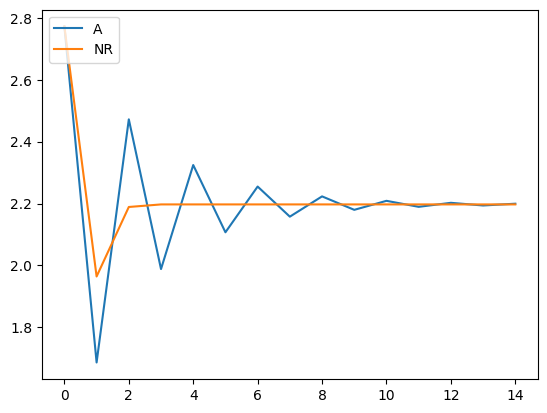

0.5885327439818611
0.5947108039146035


In [111]:
#QUESTION 2 :

"""
Propose two different fixed point methods for approximating the smallest positive root of
sin x = e^-x, such that one method is linearly convergent, and the other is quadratically
convergent. Perform experimental tests to show that indeed they have the desired
convergence orders.
"""


#A : x_(n+1) = arcsin(e^(-x_n))
#B : x_(n+1) = -ln(sin(x))
#C : x_(n+1) = x_n + k(e^(-x_n)-sin(x_n))


# we try A : linear convergence.
def my_A_root(x,n):

    e = math.exp(1)

    for i in range(n):

        x = math.asin(e**(-x))
    return x


#NewTon-Raphson (at least quadratic)

# x_(n+1) = x_n - f(x_n)/f'(x_n) 

# x_(n+1) = x_n - (sin(x_n) - e^(-x_n))/cos(x_n)+e^(-x_n)





def newton_raphson(x,n) :

    e = math.exp(1)

    for i in range(n):

        x = x - (math.sin(x) - e ** (-x))/(math.cos(x) + e ** (-x))


    return x


horizontal = []
vertical = []

for n in range(15) :

    x = 1

        
    my_A_root_Value = my_A_root(x, n)
    realValue = 0.05885327439812 # source : https://www.geogebra.org/calculator
    
    absoluteError = abs(realValue - my_A_root_Value) 
    relativeError = absoluteError/abs(realValue)
    
    if abs(relativeError) != 0 : 
        vertical.append(math.log(abs(relativeError)))
        horizontal.append(n)
        
    #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
plt.plot(horizontal,vertical, label="A")

horizontal = []
vertical = []

for n in range(15) :

    x = 1

        
    newton_raphson_value = newton_raphson(x, n)
    realValue = realValue = 0.05885327439812 # source : https://www.geogebra.org/calculator
    
    absoluteError = abs(realValue - newton_raphson_value) 
    relativeError = absoluteError/abs(realValue)
    
    if abs(relativeError) != 0 : 
        vertical.append((math.log(abs(relativeError))))
        horizontal.append(n)
        
    #print(str(x) + ((25 - len(str(x))) * " ") + str(myValue) +((25 - len(str(myValue))) * " ") + str(realValue) + ((25 - len(str(realValue))) * " ") + str( absoluteError) +((25 - len(str(absoluteError))) * " ") + str( relativeError))
    
    
plt.plot(horizontal,vertical, label="NR")



leg = plt.legend(loc='upper left')
plt.show()

print(newton_raphson(1,10))
print(my_A_root(1,10))

# as we can see. NR has quadratic converge, and stabilise directly, 
# while A takes >10 iteration to converge in the same way !




In [101]:
#QUESTION 3 :

"""
Recall the triple angle formula
cos(3x) = 4(cos(x))^3 − 3 cos(x),
which tells us that if we can solve the equation 4(y^3) − 3y = a for any given a ∈ [−1, 1],
then we can trisect any angle, meaning that cos( α/3 ) can be inferred from the value of
cos α. For the purpose of trisecting angles, design an iterative method to solve the equation 4y3 − 3y = a, where 0 ≤ a ≤ 1 is given.
Note that the equation has in general 3 roots, but they are related so that any one of the roots would give full information
about the others. Test the convergence speed of your method. Compute sin 20◦ by
trisecting the angle 60◦, and compare it to the value you get from using the power series
code for sin x from Part 1.
"""
#4y^3 - 3y = a -> 4y^3 - 3y - a = 0

#NewTon-Raphson (at least quadratic)

# x_(n+1) = x_n - f(x_n)/f'(x_n) 

# x_(n+1) = x_n - (4(x_n)^3 - 3(x_n) - a)/(12(x_n)^2-3)


def trisect_newton_raphson(x,a,n):

    for i in range(n):
      
        x = x - (4 * (x **3) - (3 * x) - a)/(12 * (x ** 2) - 3)

    return x

# we know sin(x)^2 + cos(x)^2 = 1
# -> sin(20◦) = sqrt(1 - cos(20◦)^2)
# cos(20◦) = cos(60◦/3) 
# cos(60◦) = cos(3 * 20◦)= 4 cos(20◦)^4 - 3cos(20◦) = 0.5
# 
# we need a solution to : 4y^3 - 3y = 0.5, then sin(20◦) = sqrt(1 - y^2)

#print(trisect_newton_raphson(0.5, 0.5, 40))

real = math.sin(math.radians(20))
trisct = math.sqrt(1 - trisect_newton_raphson(1, 0.5, 5) ** 2)
serie1 = sin(math.radians(20), 5)
serie2 = sin2(math.radians(20), 5)

print("real value: " + str(real))
print("trisection value: " + str(trisct) + " error: " + str(abs(real - trisct)/real))
print("serie1 value: " + str(serie1) + " error: " + str(abs(serie1 - real)/real))
print("serie2 value: " + str(serie2) + " error: " + str(abs(serie2 - real)/real))

#This is a lot better than with the series !" 






real value: 0.3420201433256687
trisection value: 0.342020143325669 error: 8.115187411403511e-16
serie1 value: 0.34202014332590347 error: 6.86382551256509e-13
serie2 value: 0.34202014332590347 error: 6.86382551256509e-13
